In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec

In [2]:
colores = {
    "volveria_si": "palegreen",
    "volveria_no": "mistyrose",
    "palermo": "khaki",
    "chacarita": "lightcoral",
    "quilmes": "deepskyblue",
    "sala_normal": "tab:brown",
    "sala_3d": "tab:gray",
    "sala_4d": "tab:cyan",
}

---

# **Análisis de los datasets**

Los datos recolectados en la encuesta estan en dos archivos distintos:
- tp-2020-2c-train-cols1.csv
- tp-2020-2c-train-cols2.csv  

Veamos que información tiene cada uno.

In [3]:
df1 = pd.read_csv('tp-2020-2c-train-cols1.csv')
df2 = pd.read_csv('tp-2020-2c-train-cols2.csv')

## 1) tp-2020-2c-train-cols1.csv

In [4]:
df1.head()

,id_usuario,volveria
0,117,0
1,658,0
2,794,0
3,455,0
4,173,1


Este dataset tiene el id de cada usuario y un flag indicando si volvería o no a __FiuMark__ a ver Frozen 4.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_usuario  801 non-null    int64
 1   volveria    801 non-null    int64
dtypes: int64(2)
memory usage: 12.6 KB


Vemos que todos los usuarios respondieron si volverían o no. Verifiquemos que todos los id de usuarios son distintos:

In [6]:
df1["id_usuario"].nunique()

801

En efecto, todos los id de usuarios son distintos.

## 2) tp-2020-2c-train-cols2.csv

In [7]:
df2.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo


Este dataset tiene todas las preguntas personales que se le hicieron a los usuarios, y también el id de usuario.

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tipo_de_sala   801 non-null    object 
 1   nombre         801 non-null    object 
 2   id_usuario     801 non-null    int64  
 3   genero         801 non-null    object 
 4   edad           641 non-null    float64
 5   amigos         801 non-null    int64  
 6   parientes      801 non-null    int64  
 7   id_ticket      801 non-null    object 
 8   precio_ticket  801 non-null    int64  
 9   fila           177 non-null    object 
 10  nombre_sede    799 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 69.0+ KB


Contamos con todas las respuestas para la mayoría de las preguntas. Las excepciones son:
- edad: 641 respuestas.
- fila: 177 respuestas.
- nombre_sede: 799 respuestas. Sólo faltan 2.

Verifiquemos también para este dataset que el id de usuario no se repita:

In [9]:
df2["id_usuario"].nunique()

801

En efecto, todos los id de usuarios son distintos.

# **Combinación de los datasets**

Dado que los dos datasets tienen la columna **id_usuario**, podemos combinarlos para tener toda la información en uno solo.

In [10]:
df = (pd.merge(left=df2, right=df1, how="left", on="id_usuario", validate="one_to_one"))

In [11]:
df.head()

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
0,4d,Señor Camilo Pedro,117,hombre,73.5,0,0,59258;,1,NaN,fiumark_quilmes,0
1,4d,Señora Raquel Angelica,658,mujer,35.0,1,1,586:6;,2,NaN,fiumark_quilmes,0
2,normal,Señor Antonio Federico,794,hombre,NaN,0,0,"RE""39822",3,NaN,fiumark_chacarita,0
3,4d,Señor Osvaldo Aureliano,455,hombre,NaN,0,0,"C17""4:39",1,NaN,fiumark_palermo,0
4,4d,Señorita Rita Eudosia,173,mujer,4.0,1,1,569964,2,NaN,fiumark_palermo,1


# **Preguntas iniciales**
Ahora que conocemos los datos de la encuesta, planteamos las preguntas iniciales que intentaremos responder analizando esos datos:

1. Qué porcentaje de encuestados volvería a FiuMark a ver Frozen 4?

2. Sede
- 2.1 Cómo se distribuyen los encuestados según la sede?
- 2.2 Influye la sede en la intención de volver?

3. Sala
- 3.1 Qué salas utilizaron los encuestados?
- 3.2 Influye el tipo de sala en la intención de volver?

4. Precio del ticket
- 4.1 Qué tipos de entradas se pagaron?
- 4.2 Influye el precio de ticket en la intención del volver?

5. Amigos y parientes
- 5.1 Qué cantidad fue solo? Qué cantidad fue acompañado?
- 5.2 Influye si fue solo, con amigos, con parientes, o con ambos (amigos y parientes) en la intención de volver?

6. Género
- 6.1 Qué cantidad de encuestados hubo según genero?
- 6.2 Influye el género en la intencion de volver?

7. Edad
- 7.1.1 En qué rango de edad están los encuestados?
- 7.1.2 Influye la edad en la intención de volver?
- 7.2 Cómo se comporta el grupo de quienes no respondieron su edad?

8. Fila
- 8.1 Influye haber respondido la fila utilizada en la intención de volver?
- 8.2 Qué tipos de filas se utilizaron?
- 8.3 Influye la fila utilizada en la intención de volver?


Antes de comenzar el análisis para responder estas preguntas, tenemos que verificar la calidad de los datos recolectados en la encuesta:

---

# **Análisis Previo**

Como vimos antes, las columnas ```edad```, ```fila``` y ```nombre_sede``` tienen valores nulos.

Determinemos qué proporción de valores en dichos campos son nulos:

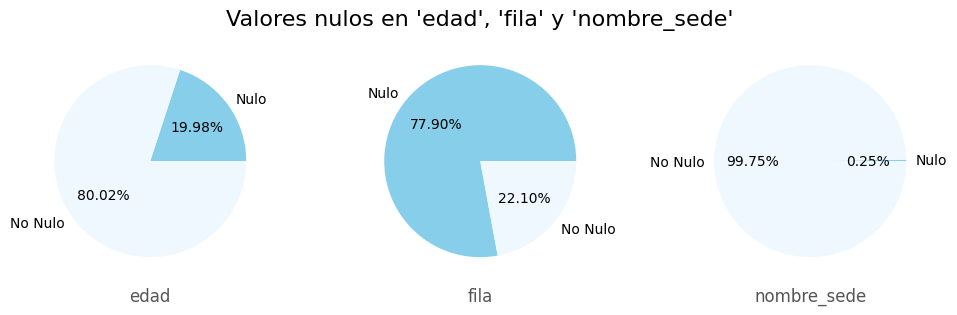

In [12]:
    fig = plt.figure(dpi=(100))
    fig.suptitle("Valores nulos en 'edad', 'fila' y 'nombre_sede'", fontsize=16, x=0.8)
    edad_nulls = df['edad'].isnull().value_counts().sort_index(ascending=False)
    fila_nulls = df['fila'].isnull().value_counts().sort_index(ascending=False)
    sede_nulls = df['nombre_sede'].isnull().value_counts().sort_index(ascending=False)

    _labels = ['Nulo', 'No Nulo']
    _colors = ["skyblue", "aliceblue"]

    ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
    ax1.set_xlabel("edad")
    ax1.pie(edad_nulls, colors=_colors, autopct="%1.2f%%", labels=_labels)
    ax2 = fig.add_axes([.55, 0.3, .5, .6], aspect=1)
    ax2.set_xlabel("fila")
    ax2.pie(fila_nulls, colors=_colors, autopct="%1.2f%%", labels=_labels)
    ax3 = fig.add_axes([1.1, 0.3, .5, .6], aspect=1)
    ax3.set_xlabel("nombre_sede")
    ax3.pie(sede_nulls, colors=_colors, autopct="%1.2f%%", labels=_labels)
    plt.show()

Vemos que:
- Aproximadamente el 20% de las encuestas no tiene registro de la edad del usuario.
- Aproximadamente el 78% de las encuestas no tiene registro de la fila.
- Apenas un 0,25% de las encuestas no tiene registro del nombre de la sede. Veamos cuales son:

In [13]:
df.loc[df['nombre_sede'].isnull()]

,tipo_de_sala,nombre,id_usuario,genero,edad,amigos,parientes,id_ticket,precio_ticket,fila,nombre_sede,volveria
494,normal,Señora Matilde Carolina,830,mujer,65.0,0,0,335794,8,adelante,NaN,1
649,normal,Señorita Rosa Cornelia,62,mujer,41.0,0,0,335794,8,adelante,NaN,1


Nuestro tratamiento de las columnas con datos nulos será el siguiente:

- Respecto de la columna ```fila```, se analizarán aquellos casos en los que los entrevistados han indicado la fila utilizada.

- Respecto de la columna ```edad```, se analizarán por separado a los entrevistados que indicaron su edad y a los que no lo hicieron.

- Respecto de los valores faltantes en las columna ```nombre_sede```, decidimos ignorar sus correspondientes registros al momento de analizar su relación con el valor del target.

---

# **Análisis de datos**
Habiendo identificado los datos faltantes y determinado su impacto en el análisis, intentamos responder las preguntas planetadas inicialmente:

## **1. Qué porcentaje de encuestados volvería a __FiuMark__ a ver Frozen 4**?

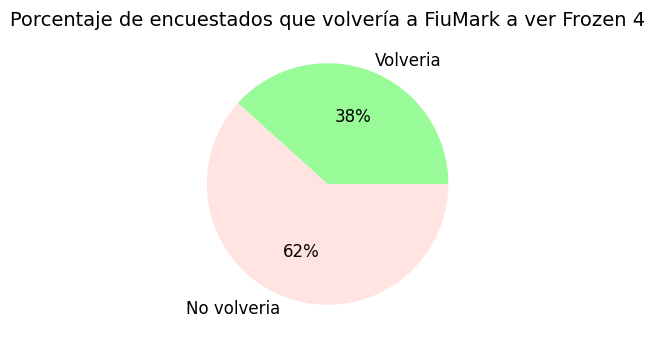

In [14]:
fig, ax = plt.subplots(dpi=(100))
volveria = df['volveria'].replace({1:"Volveria", 0:"No volveria"}).value_counts().sort_index(ascending=False)
_labels = ['Volveria', 'No volveria']

ax.set_title("Porcentaje de encuestados que volvería a FiuMark a ver Frozen 4", fontsize=14)
_, texts, autotexts = ax.pie(volveria, colors=[colores["volveria_si"], colores["volveria_no"]], autopct="%1.0f%%", labels=_labels)

[text.set_fontsize(12) for text in texts]
[autotext.set_fontsize(12) for autotext in autotexts]
autotexts[1].set_fontsize(12)

plt.show()

Vemos que en general los encuestados no volverían a FiuMark para ver Frozen 4.

<hr>

## **2. Sede**

### **2.1. Cómo se distribuyen los encuestados según la sede?**

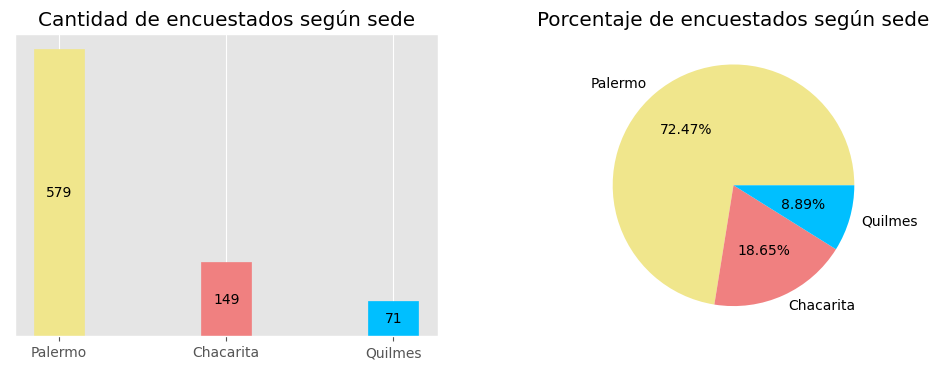

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=100, figsize=(12, 4))

d = {"fiumark_palermo":"Palermo", "fiumark_chacarita":"Chacarita","fiumark_quilmes":"Quilmes"}
por_sede = df['nombre_sede'].replace(d).value_counts()
bars = axes[0].bar(por_sede.index, por_sede.values, width=0.3, color="skyblue")

color_palermo = colores["palermo"]
color_chacarita = colores["chacarita"]
color_quilmes = colores["quilmes"]
colors = [color_palermo, color_chacarita, color_quilmes]

bars[0].set_color(color_palermo)
bars[1].set_color(color_chacarita)
bars[2].set_color(color_quilmes)

axes[0].set_title("Cantidad de encuestados según sede")
axes[0].set_yticks([])

axes[1].pie(por_sede, labels=por_sede.index, autopct='%.2f%%', colors=colors)
axes[1].set_title("Porcentaje de encuestados según sede")

for rect in bars:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width()/2., height / 2 - 15, '%d' % int(height), ha='center', va='bottom')

plt.show()

### **2.2. Influye la sede en la intención de volver?**

In [16]:
def plot_sede(df):

    fig = plt.figure(dpi=(100))
    fig.suptitle("Volvería a FiuMark para ver Frozen 4?", fontsize=16, x=0.7)
    fiumark_palermo = df.loc[df['nombre_sede'].eq('fiumark_palermo')]['volveria'].value_counts().sort_index(ascending=False)
    fiumark_chacarita = df.loc[df['nombre_sede'].eq('fiumark_chacarita')]['volveria'].value_counts().sort_index(ascending=False)
    fiumark_quilmes = df.loc[df['nombre_sede'].eq('fiumark_quilmes')]['volveria'].value_counts().sort_index(ascending=False)

    _labels = ['Si', 'No']
    _colors = [colores["volveria_si"], colores["volveria_no"]]

    ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
    ax1.set_xlabel("Fiumark Palermo")
    ax1.pie(fiumark_palermo, colors=_colors, autopct="%1.0f%%", labels=_labels)
    ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
    ax2.set_xlabel("Fiumark Chacarita")
    ax2.pie(fiumark_chacarita, colors=_colors, autopct="%1.0f%%", labels=_labels)
    ax3 = fig.add_axes([1, 0.3, .5, .6], aspect=1)
    ax3.set_xlabel("Fiumark Quilmes")
    ax3.pie(fiumark_quilmes, colors=_colors, autopct="%1.0f%%", labels=_labels)
    plt.show()

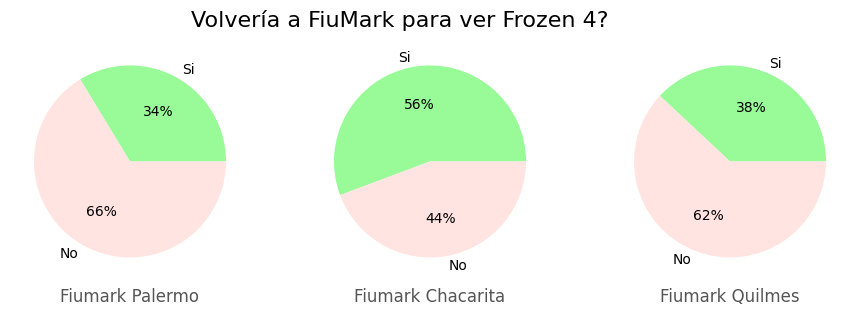

In [17]:
plot_sede(df)

Vemos que la única sede en la que la mayoría de los encuestados respondió que volvería a FiuMark es la sede de **Chacarita**, pero no por mucho margen.

<hr>

## **3. Sala**

### **3.1. Qué salas utilizaron los encuestados?**

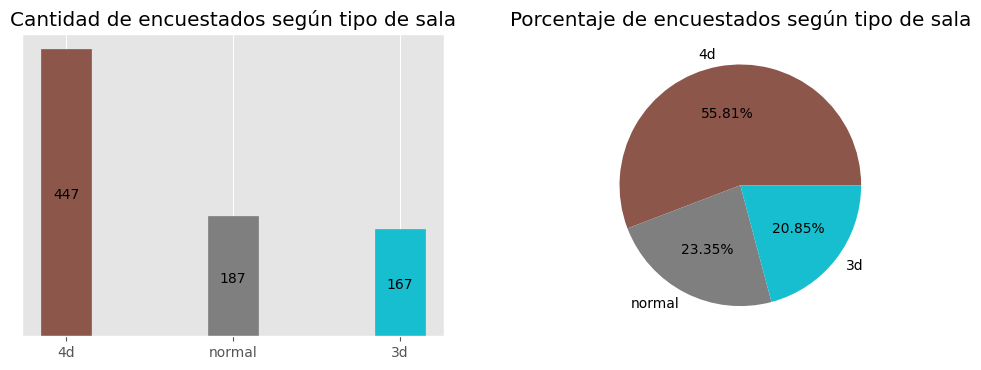

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=100, figsize=(12, 4))

por_sala = df['tipo_de_sala'].value_counts()
bars = axes[0].bar(por_sala.index, por_sala.values, width=0.3, color="skyblue")

color_normal = colores["sala_normal"]
color_3d = colores["sala_3d"]
color_4d = colores["sala_4d"]
colors = [color_normal, color_3d, color_4d]

bars[0].set_color(color_normal)
bars[1].set_color(color_3d)
bars[2].set_color(color_4d)

axes[0].set_title("Cantidad de encuestados según tipo de sala")
axes[0].set_yticks([])

axes[1].pie(por_sala, labels=por_sala.index, autopct='%.2f%%', colors=colors)
axes[1].set_title("Porcentaje de encuestados según tipo de sala")

for rect in bars:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width() / 2, height / 2 - 15, '%d' % int(height), ha='center', va='bottom')

plt.show()

La mayoría de los encuestados utilizó una sala **4d**.

### **3.2 Influye el tipo de sala en la intención de volver?**

In [19]:
def plot_sala(df):
    fig = plt.figure(dpi=(100))

    fig.suptitle("Volvería a FiuMark para ver Frozen 4?", fontsize=16, x=0.7)
    _4d = df.loc[df['tipo_de_sala'].eq('4d')]['volveria'].value_counts().sort_index(ascending=False)
    _3d = df.loc[df['tipo_de_sala'].eq('3d')]['volveria'].value_counts().sort_index(ascending=False)
    _2d = df.loc[df['tipo_de_sala'].eq('normal')]['volveria'].value_counts().sort_index(ascending=False)

    _labels = ["Sí", "No"]
    _colors = [colores["volveria_si"], colores["volveria_no"]]

    ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
    ax1.set_xlabel("Vio Frozen 3 en 4d")
    ax1.pie(_4d, colors=_colors, autopct="%1.0f%%", labels=_labels)
    ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
    ax2.set_xlabel("Vio Frozen 3 en 3d")
    ax2.pie(_3d, colors=_colors, autopct="%1.0f%%", labels=_labels)
    ax3 = fig.add_axes([1, 0.3, .5, 0.6], aspect=1)
    ax3.set_xlabel("Vio Frozen 3 en 2d")
    ax3.pie(_2d, colors=_colors, autopct="%1.0f%%", labels=_labels)

    plt.show()

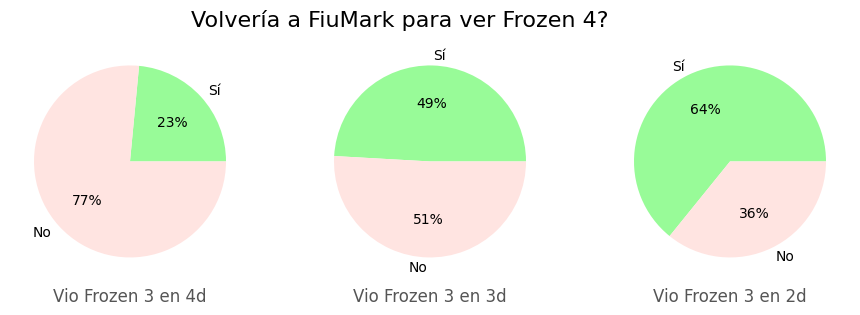

In [20]:
plot_sala(df)

Vemos que el único caso en el que la mayoría de los encuestados volvería, es el caso de quienes vieron Frozen 3 en sala **2d**.

<hr>

## **4. Precio del ticket**

### **4.1 Qué tipos de entradas se pagaron?**

In [21]:
print(df["precio_ticket"].min())
print(df["precio_ticket"].max())

1
50


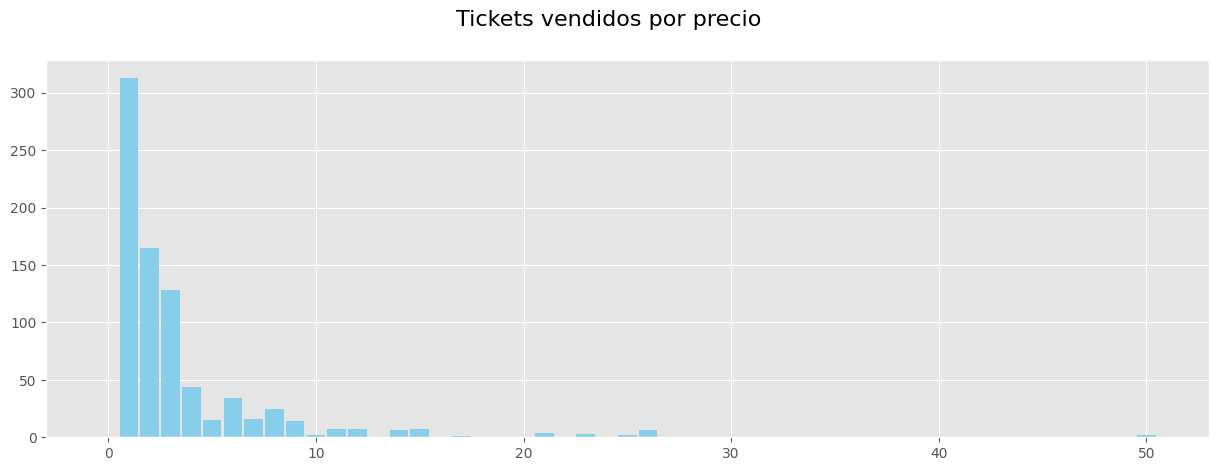

In [22]:
fig = plt.figure(dpi=100, figsize = (15,5))

fig.suptitle("Tickets vendidos por precio", fontsize=16)

plt.hist(df['precio_ticket'], bins=np.arange(52)-0.5, color='skyblue', rwidth=0.9)
plt.show()

Notamos que la mayoría de los entrevistados adquirió tickets con precios entre 1 y 3.

### **4.2 Influye el precio de ticket en la intención del volver?**

In [23]:
df_aux = df.copy()
df_aux['no_volveria'] = ~df_aux['volveria'].astype(bool)
df_aux_2 = df_aux.groupby("precio_ticket").sum()

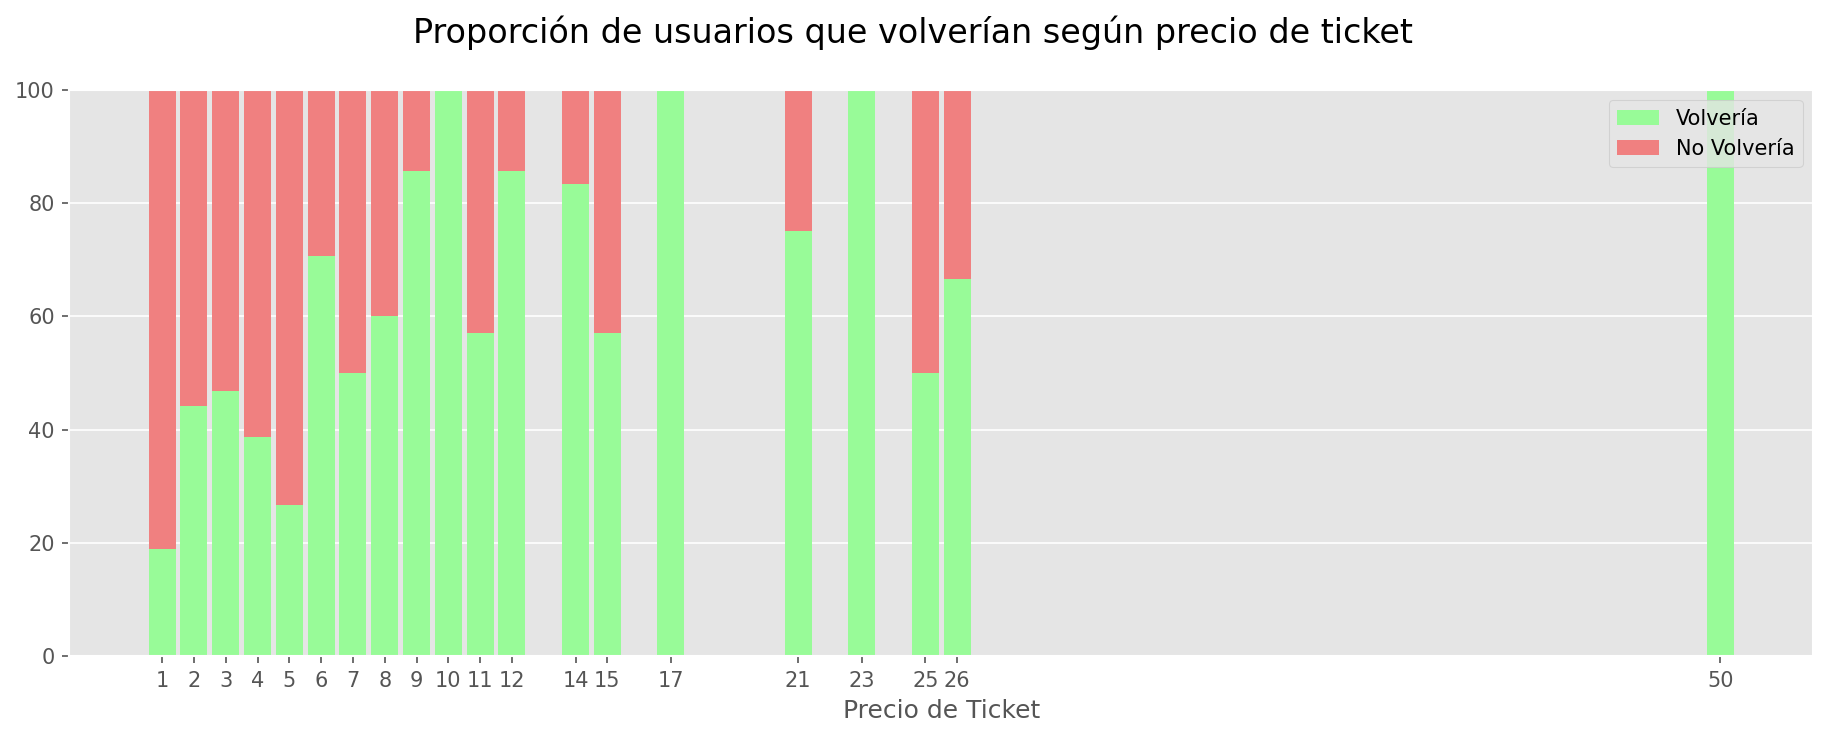

In [24]:
r = df_aux_2.index.tolist()
prec_volveria = df_aux_2['volveria'].tolist()
prec_no_volveria = df_aux_2['no_volveria'].tolist()

totals = [i+j for i,j in zip(prec_volveria, prec_no_volveria)]
b_volveria = [i / j * 100 for i,j in zip(prec_volveria, totals)]
b_no_volveria = [i / j * 100 for i,j in zip(prec_no_volveria, totals)]
 
fig, ax = plt.subplots(dpi=(150), figsize=(15,5))
fig.suptitle("Proporción de usuarios que volverían según precio de ticket", fontsize=16)

barWidth = 0.85
ax.bar(r, b_volveria, color="palegreen", width=barWidth, label="Volvería")
ax.bar(r, b_no_volveria, bottom=b_volveria, color="lightcoral", width=barWidth, label="No Volvería")
ax.legend()

plt.xticks(r)
plt.xlabel("Precio de Ticket")

plt.show()

Notamos que en general para tickets con precio superior a 5, los entrevistados mostraron intención de volver. Sin embargo, como se vio en el histograma anterior, estos casos representan una pequeña proporción de los entrevistados.

<hr>

## **5. Amigos y parientes**

### **5.1 Qué cantidad fue solo? Qué cantidad fue acompañado?**

In [25]:
solos = df.loc[(df['amigos'] == 0) & (df['parientes'] == 0)]
con_amigos = df.loc[(df['amigos'] > 0) & (df['parientes'] == 0)]
con_parientes = df.loc[(df['amigos'] == 0) & (df['parientes'] > 0)]
con_ambos = df.loc[(df['amigos'] > 0) & (df['parientes'] > 0)]

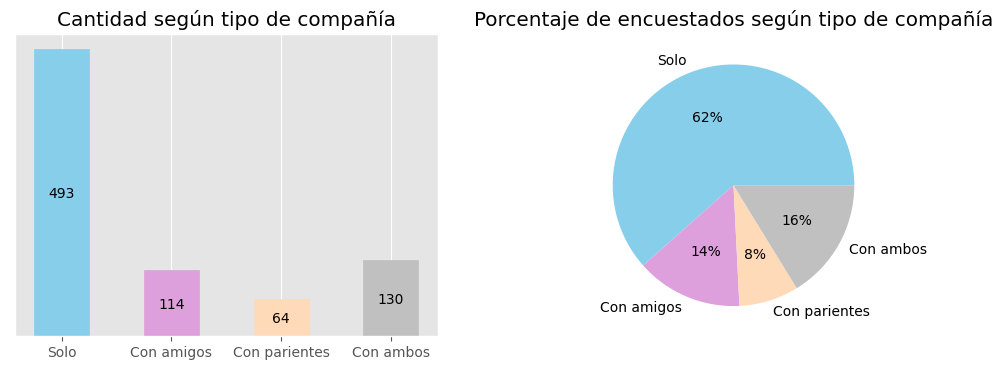

In [26]:
_row_count, _ = df.shape
_compania_labels = ["Solo", "Con amigos", "Con parientes", "Con ambos"]
_compania_sizes = np.array([solos.shape[0], con_amigos.shape[0], con_parientes.shape[0], con_ambos.shape[0]])

fig, axes = plt.subplots(nrows=1, ncols=2, dpi=100, figsize=(12, 4))

bars = axes[0].bar(_compania_labels, _compania_sizes, width=0.5)

color_solo = "skyblue"
color_amigos = "plum"
color_parientes = "peachpuff"
colors_ambos = "silver"
colores_compania = [color_solo, color_amigos, color_parientes, colors_ambos]

bars[0].set_color(color_solo)
bars[1].set_color(color_amigos)
bars[2].set_color(color_parientes)
bars[3].set_color(colors_ambos)

axes[0].set_title("Cantidad según tipo de compañía")
axes[0].set_yticks([])

axes[1].pie(_compania_sizes, labels=_compania_labels, autopct='%.0f%%', colors=colores_compania)
axes[1].set_title("Porcentaje de encuestados según tipo de compañía")

for rect in bars:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width()/2., height / 2 - 15, '%d' % int(height), ha='center', va='bottom')


plt.show()

La mayoría de los encuestados fue **solo** (sin amigos ni parientes) a ver Frozen 3.

### **5.2. Influye si fue solo, con amigos, con parientes, o con ambos (amigos y parientes) en la intención de volver?**

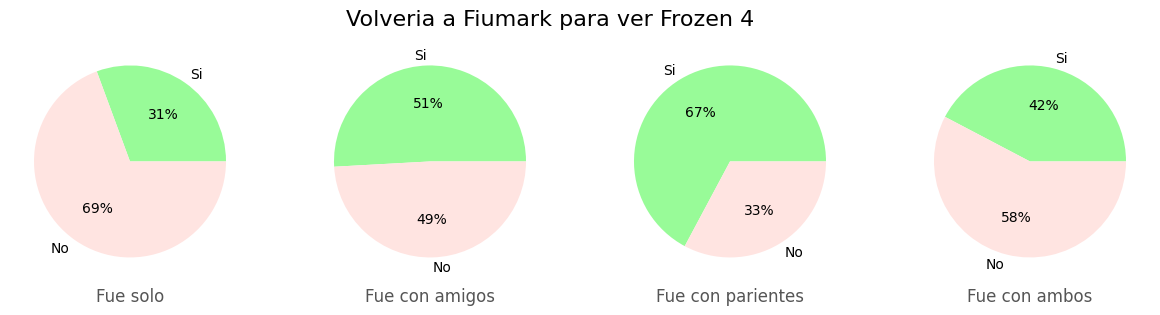

In [27]:
fig = plt.figure(dpi=(100))
fig.suptitle("Volveria a Fiumark para ver Frozen 4", fontsize=16, x=0.95)

_v1 = solos['volveria'].value_counts().sort_index(ascending=False);
_v2 = con_amigos['volveria'].value_counts().sort_index(ascending=False);
_v3 = con_parientes['volveria'].value_counts().sort_index(ascending=False);
_v4 = con_ambos['volveria'].value_counts().sort_index(ascending=False);

_labels = ['Si', 'No']
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
ax1.set_xlabel("Fue solo")
ax1.pie(_v1, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
ax2.set_xlabel("Fue con amigos")
ax2.pie(_v2, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax3 = fig.add_axes([1, 0.3, .5, 0.6], aspect=1)
ax3.set_xlabel("Fue con parientes")
ax3.pie(_v3, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax4 = fig.add_axes([1.5, 0.3, .5, .6], aspect=1)
ax4.set_xlabel("Fue con ambos")
ax4.pie(_v4, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

Vemos que la mayoria de quienes fueron solamente con parientes, volverían a **FiuMark** a ver Frozen 4.

<hr>

## **6. Género**

### **6.1. Qué cantidad de encuestados hubo según genero?**

In [28]:
df['genero'].value_counts()

hombre    513
mujer     288
Name: genero, dtype: int64

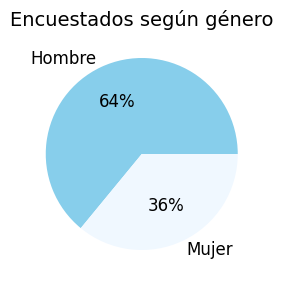

In [29]:
fig = plt.figure(dpi=(100))

_v1 = df['genero'].value_counts();

ax1 = fig.add_axes([1, 0, .5, .6], aspect=1)
_, texts, autotexts = ax1.pie(_v1, colors=['skyblue', 'aliceblue'], autopct="%1.0f%%", labels=['Hombre', 'Mujer'])
[text.set_fontsize(12) for text in texts]
[autotext.set_fontsize(12) for autotext in autotexts]
ax1.set_title("Encuestados según género", fontsize=14)

plt.show()

### **6.2 Influye el género en la intencion de volver?**

In [30]:
mujeres = df.loc[df['genero'].eq('mujer')]
hombres = df.loc[df['genero'].eq('hombre')]

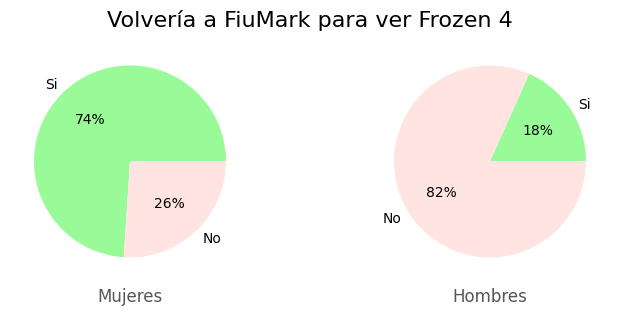

In [31]:
fig = plt.figure(dpi=(100))
fig.suptitle("Volvería a FiuMark para ver Frozen 4", fontsize=16, x=0.55)

_v1 = mujeres['volveria'].value_counts().sort_index(ascending=False);
_v2 = hombres['volveria'].value_counts().sort_index(ascending=False);

_labels = ['Si', 'No']
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
ax1.set_xlabel("Mujeres")
ax1.pie(_v1, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax2 = fig.add_axes([.6, 0.3, .5, .6], aspect=1)
ax2.set_xlabel("Hombres")
ax2.pie(_v2, colors=_colors, autopct="%1.0f%%", labels=_labels)
plt.show()

Aquí vemos que la gran mayoría de las mujeres volvería a **FiuMark** a ver Frozen 4, y que la gran mayoría de los hombres no volvería.

<hr>

## **7. Edad**

Analizaremos primero aquellos registros para los cuales se cuenta con el dato de la edad, y luego aquellos con valores nulos en dicho campo. Recordemos que las cantidades de valores nulos y no nulos en la columna ```edad``` son:

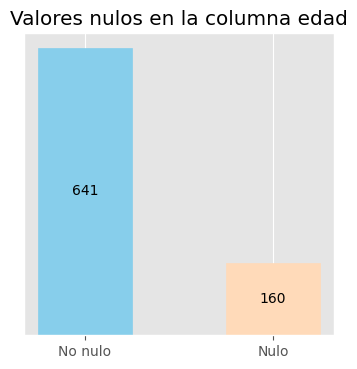

In [32]:
edad_nulos = df.loc[df['edad'].isnull()]
edad_no_nulos = df.loc[~df['edad'].isnull()]

_row_count, _ = df.shape
_edad_labels = ["No nulo", "Nulo"]
_edad_sizes = np.array([edad_no_nulos.shape[0], edad_nulos.shape[0]])

fig, axes = plt.subplots(dpi=100, figsize=(4, 4))

bars = axes.bar(_edad_labels, _edad_sizes, width=0.5)

color_no_nulos = "skyblue"
color_nulos = "peachpuff"
colores_edad = [color_no_nulos, color_nulos]

bars[0].set_color(color_no_nulos)
bars[1].set_color(color_nulos)

axes.set_title("Valores nulos en la columna edad")
axes.set_yticks([])

for rect in bars:
    height = rect.get_height()
    axes.text(rect.get_x() + rect.get_width()/2., height / 2 - 15, '%d' % int(height), ha='center', va='bottom')


plt.show()

### **7.1 Entrevistados que indicaron su edad**

### **7.1.1 En qué rango de edad están los encuestados?**

In [33]:
con_edad = df.loc[~df['edad'].isnull()]
con_edad.edad.quantile([0.25,0.5,0.75])

0.25    23.0
0.50    31.0
0.75    41.0
Name: edad, dtype: float64

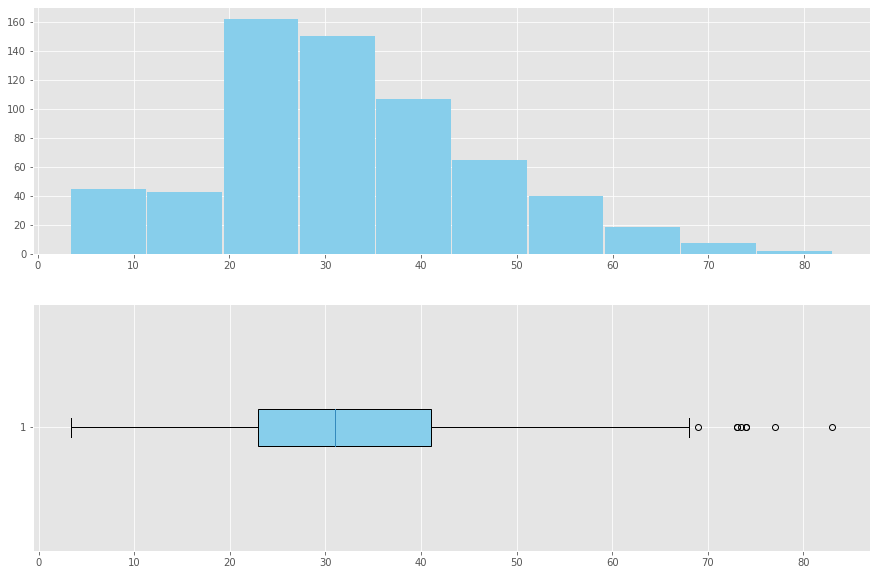

In [34]:
fig, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

_bins = int(np.round(np.log2(df['edad'].count()) + 1))
ax1[0].hist(con_edad['edad'], bins=_bins, color="skyblue", rwidth=0.98)

edades = np.array(con_edad['edad'])
bp = ax1[1].boxplot(edades, vert=False, patch_artist=True)
bp['boxes'][0].set_facecolor('skyblue')
plt.show()

Notamos que la mayoría de los entrevistados que indicaron su edad se encuentran en el rango entre 20 y 40 años.

### **7.1.2. Influye la edad en la intención de volver?**

Para el siguiente análisis decidimos separar la población de 641 usuarios de la siguiente forma:

a) Por cuartiles

In [35]:
con_edad.edad.quantile([0.25,0.5,0.75])

0.25    23.0
0.50    31.0
0.75    41.0
Name: edad, dtype: float64

In [36]:
hasta_Q1 = df.loc[df['edad'] <= 23]
_Q1_a_mediana = df.loc[(df['edad'] > 23)&(df['edad'] <= 31)]
_mediana_a_Q3 = df.loc[(df['edad'] > 31)&(df['edad'] <= 41)]
desde_Q3 = df.loc[df['edad'] > 41]

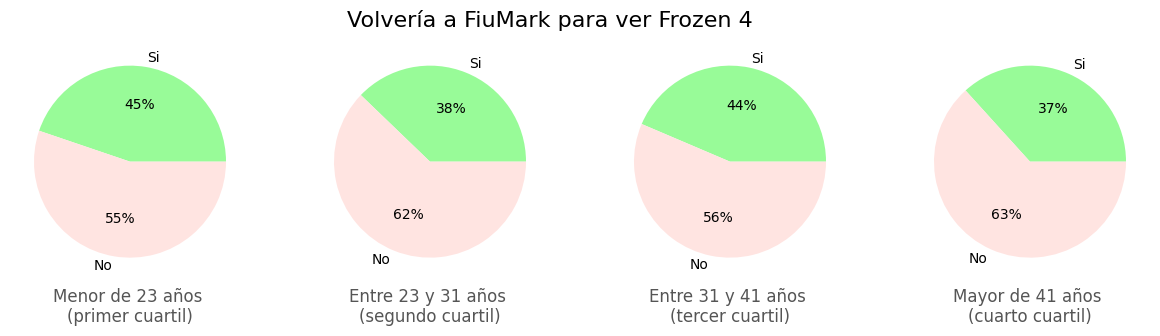

In [37]:
fig = plt.figure(dpi=(100))
fig.suptitle("Volvería a FiuMark para ver Frozen 4", fontsize=16, x=0.95)

_v1 = hasta_Q1['volveria'].value_counts().sort_index(ascending=False);
_v2 = _Q1_a_mediana['volveria'].value_counts().sort_index(ascending=False);
_v3 = _mediana_a_Q3['volveria'].value_counts().sort_index(ascending=False);
_v4 = desde_Q3['volveria'].value_counts().sort_index(ascending=False);

_labels = ['Si', 'No']
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
ax1.set_xlabel("Menor de 23 años \n(primer cuartil)")
ax1.pie(_v1, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
ax2.set_xlabel("Entre 23 y 31 años \n(segundo cuartil)")
ax2.pie(_v2, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax3 = fig.add_axes([1, 0.3, .5, 0.6], aspect=1)
ax3.set_xlabel("Entre 31 y 41 años \n(tercer cuartil)")
ax3.pie(_v3, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax4 = fig.add_axes([1.5, 0.3, .5, 0.6], aspect=1)
ax4.set_xlabel("Mayor de 41 años \n(cuarto cuartil)")
ax4.pie(_v4, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

No hallamos en este caso un grupo mayoritario con intención de regresar a FiuMark.

b) Por la mediana:

In [38]:
hasta_31 = df.loc[df['edad'] <= 31]
desde_31 = df.loc[(df['edad'] > 31)]

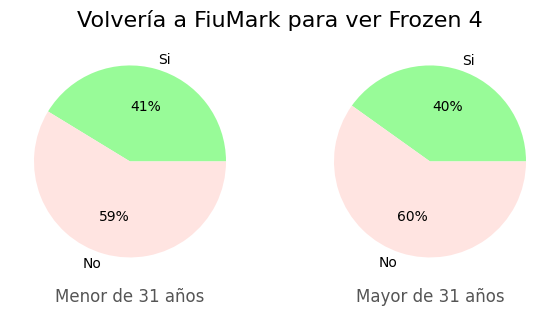

In [39]:
fig = plt.figure(dpi=(100))
fig.suptitle("Volvería a FiuMark para ver Frozen 4", fontsize=16)

_v1 = hasta_31['volveria'].value_counts().sort_index(ascending=False);
_v2 = desde_31['volveria'].value_counts().sort_index(ascending=False);

_labels = ['Si', 'No']
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
ax1.set_xlabel("Menor de 31 años")
ax1.pie(_v1, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
ax2.set_xlabel("Mayor de 31 años")
ax2.pie(_v2, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

 Con este segundo criterio tampoco hallamos un grupo mayoritario con intención de regresar a FiuMark.

### **7.2 Entrevistados que no indicaron su edad**

Analizamos la intención de volver para el grupo de 160 usuarios que no respondió su edad.

### **7.2.1 Proporción de usuarios que volvería**

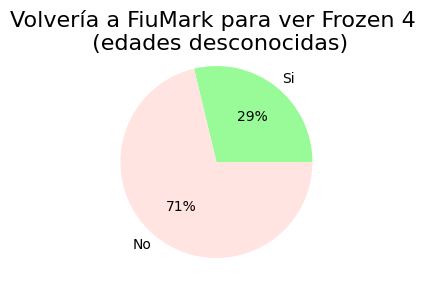

In [40]:
sin_edad = df.loc[df['edad'].isnull()]
fig = plt.figure(dpi=(100))
fig.suptitle("Volvería a FiuMark para ver Frozen 4 \n (edades desconocidas)", fontsize=16)

_v1 = sin_edad['volveria'].value_counts().sort_index(ascending=False);

_labels = ['Si', 'No']
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, 1, .6], aspect=1)
ax1.set_xlabel("")
ax1.pie(_v1, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

Notamos que la mayoría de los entrevistados en este grupo no volvería.

<hr>

## 8. Fila

Analizamos el 22% de registros que poseen datos en la columna  ```fila```.

### **8.1. Intención de volver según si respondió fila utilizada o no**

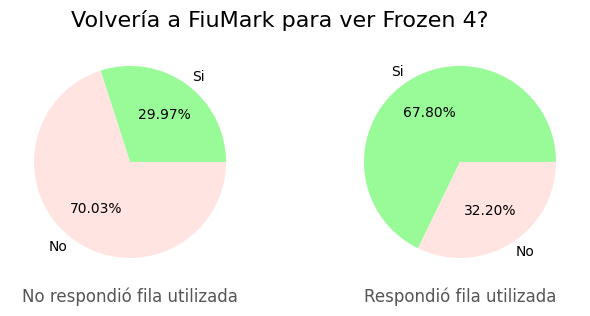

In [41]:
    sin_fila = df.loc[df['fila'].isnull()]
    con_fila = df.loc[~df['fila'].isnull()]
    
    fig = plt.figure(dpi=(100))
    fig.suptitle("Volvería a FiuMark para ver Frozen 4?", fontsize=16)
    volverian_sin_fila = df.loc[df['fila'].isnull()]['volveria'].value_counts().sort_index(ascending=False)
    volverian_con_fila = df.loc[~df['fila'].isnull()]['volveria'].value_counts().sort_index(ascending=False)
    

    _labels = ['Si', 'No']
    _colors = [colores["volveria_si"], colores["volveria_no"]]

    ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
    ax1.set_xlabel("No respondió fila utilizada")
    ax1.pie(volverian_sin_fila, colors=_colors, autopct="%1.2f%%", labels=_labels)
    ax2 = fig.add_axes([.55, 0.3, .5, .6], aspect=1)
    ax2.set_xlabel("Respondió fila utilizada")
    ax2.pie(volverian_con_fila, colors=_colors, autopct="%1.2f%%", labels=_labels)
    plt.show()

Notamos que en el caso de los entrevistados que respondieron que fila utilizaron, un 67% manifestó intención de regresar.

### **8.2. Qué tipos de filas se utilizaron?**

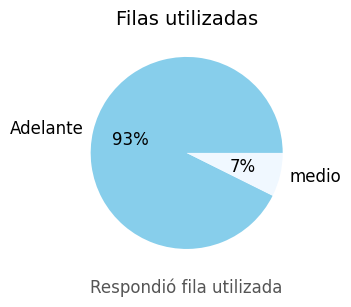

In [42]:
fig = plt.figure(dpi=(100))

_v1 = df.loc[~df['fila'].isnull()]['fila'].value_counts();

ax1 = fig.add_axes([1, 0, .5, .6], aspect=1)
_, texts, autotexts = ax1.pie(_v1, colors=['skyblue', 'aliceblue'], autopct="%1.0f%%", labels=['Adelante', 'medio'])
[text.set_fontsize(12) for text in texts]
[autotext.set_fontsize(12) for autotext in autotexts]
ax1.set_title("Filas utilizadas", fontsize=14)
ax1.set_xlabel("Respondió fila utilizada")

plt.show()

Quienes contestaron la encuesta indicaron sólo dos tipos de fila, siendo el caso más frecuente el de las filas de adelante.

### **8.3. Influye el tipo de fila utilizada en la intención de volver?**

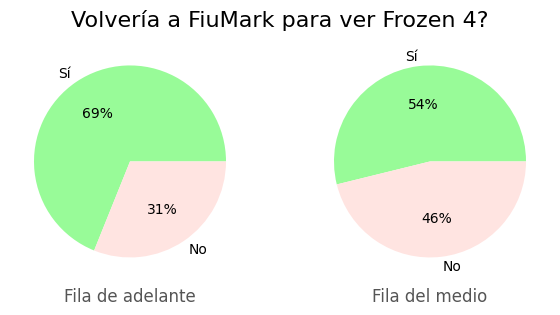

In [43]:
fig = plt.figure(dpi=(100))

fig.suptitle("Volvería a FiuMark para ver Frozen 4?", fontsize=16)
medio = con_fila.loc[df['fila'].eq('medio')]['volveria'].value_counts().sort_index(ascending=False)
adelante = con_fila.loc[df['fila'].eq('adelante')]['volveria'].value_counts().sort_index(ascending=False)

_labels = ["Sí", "No"]
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
ax1.set_xlabel("Fila de adelante")
ax1.pie(adelante, colors=_colors, autopct="%1.0f%%", labels=_labels)
ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
ax2.set_xlabel("Fila del medio")
ax2.pie(medio, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

Notamos que en general volvería a FiuMark la mayoría de los entrevistados que respondieron la pregunta, independientemente de la fila utilizada.

---

## 9. Mujeres

Del analisis anterior surge que la mayoria de las mujeres que vio Frozen 3 en alguna de las sedes de FiuMark, volveria a FiuMark a ver Frozen 4 (aproximadamente el 74% volveria). Este es un gran hallazgo, pero nos hace preguntarnos si dentro del universo de mujeres, existe alguna otra variable que influya en la intencion de volver a FiuMark.

In [44]:
mujeres = df.loc[df["genero"] == "mujer"]

### 9.1. Mujeres vs sede

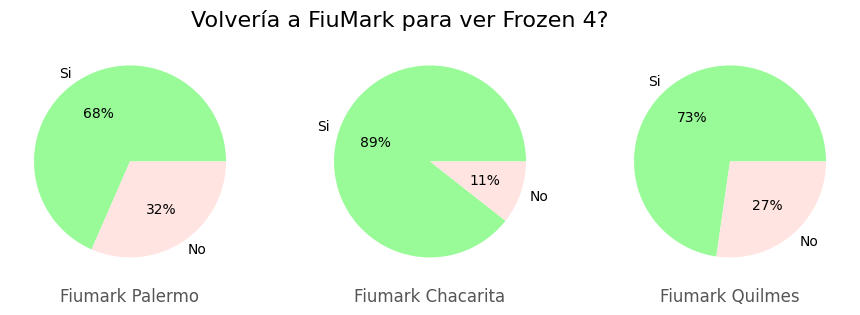

In [45]:
plot_sede(mujeres)

Vemos que la sede no influye demasiado en la decision de la mujeres de volver a **Fiumark** a ver Frozen 4. La mayoría de las mujeres volvería, independientemente de la sede en la que hayan visto Frozen 3.

### 9.2. Mujeres vs tipo de sala

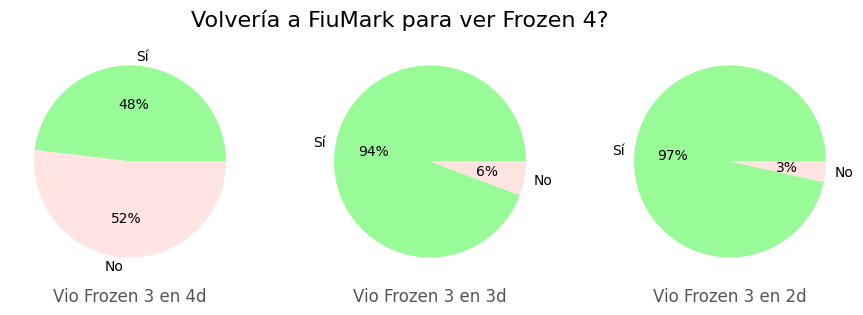

In [46]:
plot_sala(mujeres)

Sin embargo, para el tipo de sala descubrimos que sólo la mitad de las mujeres que vieron Frozen 3 en sala **4d** volvería a **Fiumark** a ver Frozen 4.  
Esto nos llama un poco la atención. Tendrá problemas la sala 4d en todas las sedes? Veamos:

### 9.3. Mujeres: sala 4d vs sede

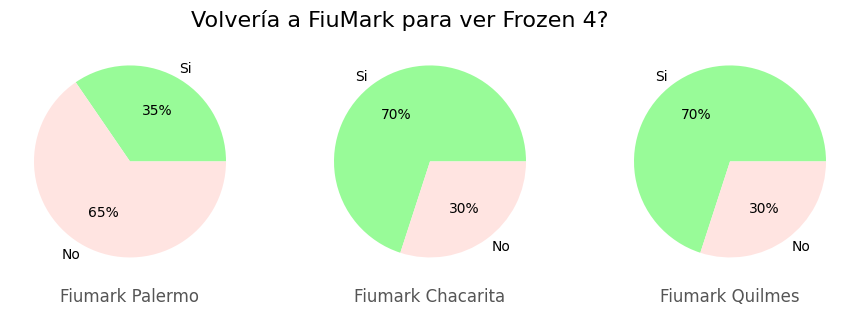

In [47]:
mujeres_4d = mujeres.loc[df["tipo_de_sala"] == "4d"]
plot_sede(mujeres_4d)

Observamos que la mayoría de las mujeres que asistió a sala **4d** en **Fiumark Palermo** no volvería a **Fiumark** a ver Frozen 4. 

<hr>

## 10. Hombres

Si bien habíamos observado en la sección 6 que sólo un 18% de los hombres volvería, analizamos el grupo de hombres e intentamos hallar un patrón que indique cuáles volverían.

In [48]:
hombres = df.loc[df["genero"] == "hombre"]

### 10.1 Hombres vs Sede

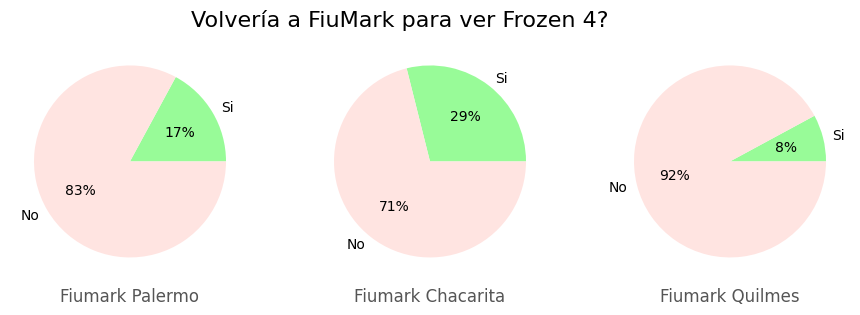

In [49]:
plot_sede(hombres)

No hallamos un grupo mayoritario predispuesto a volver al clasificar a los hombres según sede.

### 10.2 Hombres vs. Sala

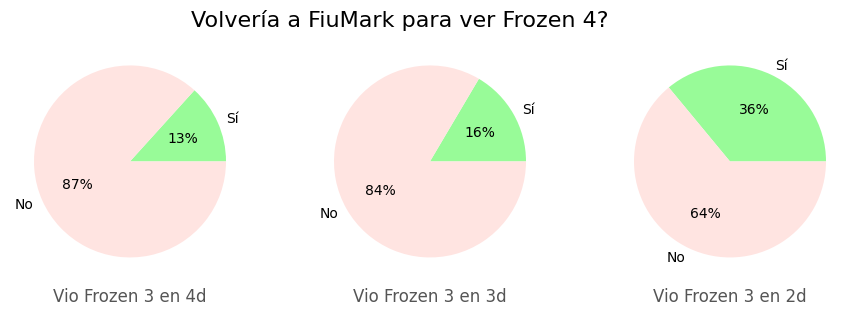

In [50]:
plot_sala(hombres)

No hallamos un grupo mayoritario predispuesto a volver al clasificar a los hombres según sala.

### 10.3 Hombres vs. Fila

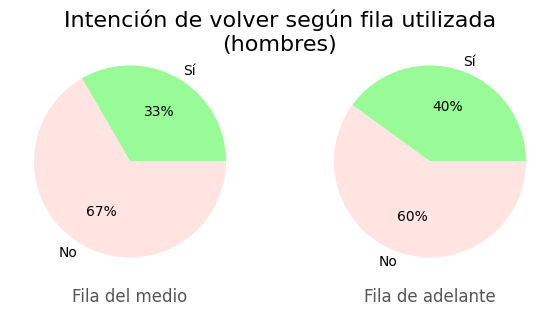

In [51]:
fig = plt.figure(dpi=(100))

fig.suptitle("Intención de volver según fila utilizada\n(hombres)", fontsize=16)
_medio = hombres.loc[df['fila'].eq('medio')]['volveria'].value_counts().sort_index(ascending=False)
_adelante = hombres.loc[df['fila'].eq('adelante')]['volveria'].value_counts().sort_index(ascending=False)

_labels = ["Sí", "No"]
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
ax1.set_xlabel("Fila del medio")
ax1.pie(_medio, colors=_colors, autopct="%1.0f%%", labels=_labels)
ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
ax2.set_xlabel("Fila de adelante")
ax2.pie(_adelante, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

No hallamos un grupo mayoritario predispuesto a volver al clasificar a los hombres según fila utilizada.

### 10.4 Hombres vs. Acompañantes

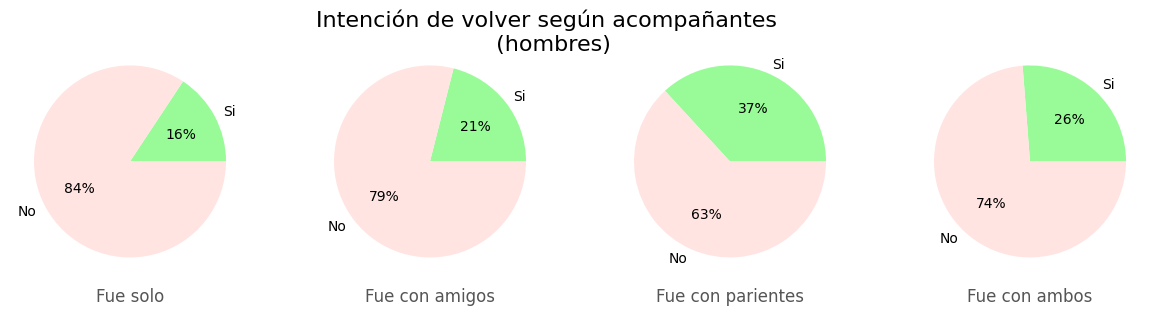

In [52]:
fig = plt.figure(dpi=(100))
fig.suptitle("Intención de volver según acompañantes \n (hombres)", fontsize=16, x=0.95)

solos = hombres.loc[(hombres['amigos'] == 0) & (hombres['parientes'] == 0)]
con_amigos = hombres.loc[(hombres['amigos'] > 0) & (hombres['parientes'] == 0)]
con_parientes = hombres.loc[(hombres['amigos'] == 0) & (hombres['parientes'] > 0)]
con_ambos = hombres.loc[(hombres['amigos'] > 0) & (hombres['parientes'] > 0)]

_v1 = solos['volveria'].value_counts().sort_index(ascending=False);
_v2 = con_amigos['volveria'].value_counts().sort_index(ascending=False);
_v3 = con_parientes['volveria'].value_counts().sort_index(ascending=False);
_v4 = con_ambos['volveria'].value_counts().sort_index(ascending=False);

_labels = ['Si', 'No']
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
ax1.set_xlabel("Fue solo")
ax1.pie(_v1, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
ax2.set_xlabel("Fue con amigos")
ax2.pie(_v2, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax3 = fig.add_axes([1, 0.3, .5, 0.6], aspect=1)
ax3.set_xlabel("Fue con parientes")
ax3.pie(_v3, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax4 = fig.add_axes([1.5, 0.3, .5, .6], aspect=1)
ax4.set_xlabel("Fue con ambos")
ax4.pie(_v4, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

Notamos que el caso que muestra mayor predisposición a volver es el de hombres que vieron Frozen 3 unicamente con sus parientes. Sin embargo, son minoría dentro de ese grupo.

### 10.5 Hombres vs Edad

### 10.5.1 Hombres vs Edad - Composición

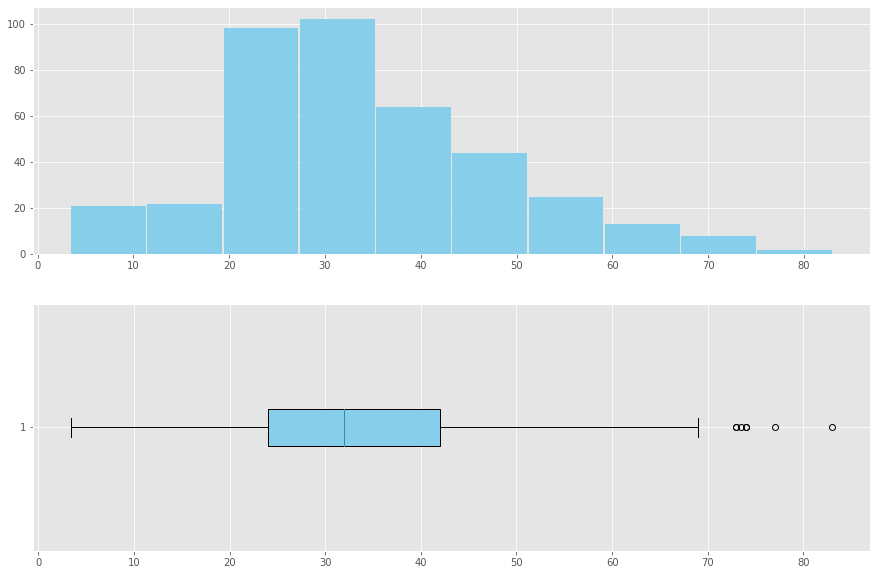

In [53]:
hombres_con_edad = hombres.loc[~hombres['edad'].isnull()]
fig, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

_bins = int(np.round(np.log2(df['edad'].count()) + 1))
ax1[0].hist(hombres_con_edad['edad'], bins=_bins, color="skyblue", rwidth=0.98)

_edades = np.array(hombres_con_edad['edad'])
bp = ax1[1].boxplot(_edades, vert=False, patch_artist=True)
bp['boxes'][0].set_facecolor('skyblue')
plt.show()

Notamos que la distribución de edades en los entrevistados varones es similar a la de la población total.

### 10.5.2 Hombres vs Edad - Intención de volver en casos que respondieron su edad

In [54]:
hombres_con_edad.edad.quantile([0.25,0.5,0.75])

0.25    24.0
0.50    32.0
0.75    42.0
Name: edad, dtype: float64

In [55]:
hasta_Q1 = hombres_con_edad.loc[hombres_con_edad['edad'] <= 24]
_Q1_a_mediana = hombres_con_edad.loc[(hombres_con_edad['edad'] > 24)&(hombres_con_edad['edad'] <= 32)]
_mediana_a_Q3 = hombres_con_edad.loc[(hombres_con_edad['edad'] > 32)&(hombres_con_edad['edad'] <= 42)]
desde_Q3 = hombres_con_edad.loc[hombres_con_edad['edad'] > 42]

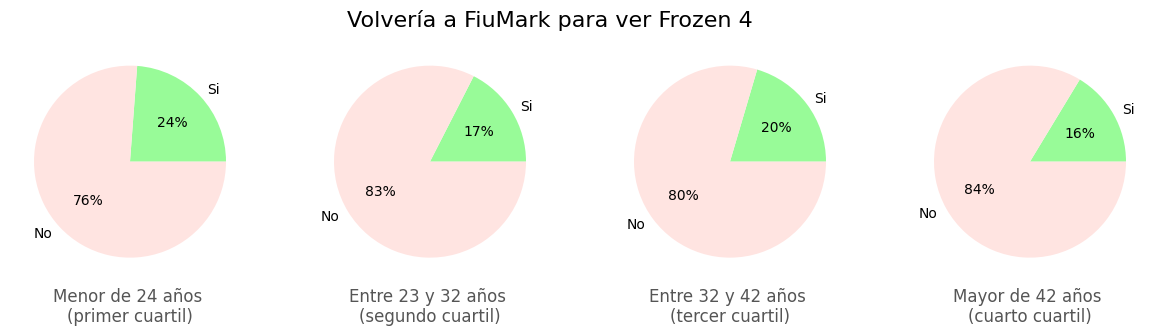

In [56]:
fig = plt.figure(dpi=(100))
fig.suptitle("Volvería a FiuMark para ver Frozen 4", fontsize=16, x=0.95)

_v1 = hasta_Q1['volveria'].value_counts().sort_index(ascending=False);
_v2 = _Q1_a_mediana['volveria'].value_counts().sort_index(ascending=False);
_v3 = _mediana_a_Q3['volveria'].value_counts().sort_index(ascending=False);
_v4 = desde_Q3['volveria'].value_counts().sort_index(ascending=False);

_labels = ['Si', 'No']
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
ax1.set_xlabel("Menor de 24 años \n(primer cuartil)")
ax1.pie(_v1, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
ax2.set_xlabel("Entre 23 y 32 años \n(segundo cuartil)")
ax2.pie(_v2, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax3 = fig.add_axes([1, 0.3, .5, 0.6], aspect=1)
ax3.set_xlabel("Entre 32 y 42 años \n(tercer cuartil)")
ax3.pie(_v3, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax4 = fig.add_axes([1.5, 0.3, .5, 0.6], aspect=1)
ax4.set_xlabel("Mayor de 42 años \n(cuarto cuartil)")
ax4.pie(_v4, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

No hallamos en este caso un grupo mayoritario con intención de regresar a FiuMark.

In [57]:
hasta_mediana = hombres_con_edad.loc[hombres_con_edad['edad'] <= 32]
desde_mediana = hombres_con_edad.loc[(hombres_con_edad['edad'] > 32)]

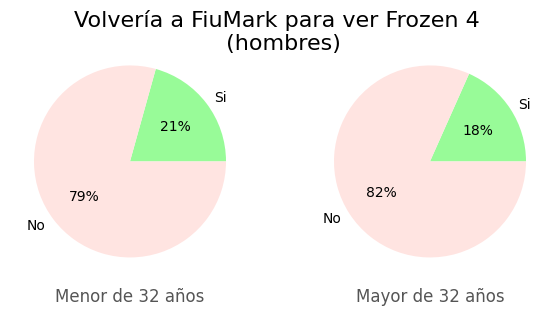

In [58]:
fig = plt.figure(dpi=(100))
fig.suptitle("Volvería a FiuMark para ver Frozen 4 \n (hombres)", fontsize=16)

_v1 = hasta_mediana['volveria'].value_counts().sort_index(ascending=False);
_v2 = desde_mediana['volveria'].value_counts().sort_index(ascending=False);

_labels = ['Si', 'No']
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, .5, .6], aspect=1)
ax1.set_xlabel("Menor de 32 años")
ax1.pie(_v1, colors=_colors, autopct="%1.0f%%", labels=_labels)

ax2 = fig.add_axes([.5, 0.3, .5, .6], aspect=1)
ax2.set_xlabel("Mayor de 32 años")
ax2.pie(_v2, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

 Con este segundo criterio tampoco hallamos un grupo mayoritario con intención de regresar a FiuMark.

### 10.5.3 Hombres vs Edad - Intención de volver en casos que no respondieron su edad

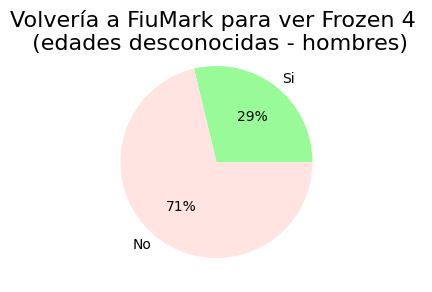

In [59]:
hombres_sin_edad = hombres.loc[hombres['edad'].isnull()]
fig = plt.figure(dpi=(100))
fig.suptitle("Volvería a FiuMark para ver Frozen 4 \n (edades desconocidas - hombres)", fontsize=16)

_v1 = sin_edad['volveria'].value_counts().sort_index(ascending=False);

_labels = ['Si', 'No']
_colors = [colores["volveria_si"], colores["volveria_no"]]

ax1 = fig.add_axes([0, 0.3, 1, .6], aspect=1)
ax1.set_xlabel("")
ax1.pie(_v1, colors=_colors, autopct="%1.0f%%", labels=_labels)

plt.show()

No hallamos un grupo mayoritario de hombres que volverían en el caso de los que no respondieron su edad.

---

# Baseline propuesto

En base al análisis realizado, en el que identificamos las siguientes mayorías más significativas de usuarios que volverían:
- Entrevistadas Mujeres
- Entrevistadas Mujeres que usaron salas 2d y 3d
- Entrevistadas Mujeres que usaron sala 4d y asistieron a las sedes de Chacarita y Quilmes

proponemos la siguiente función **baseline**:

In [60]:
def volveria(row):
    
    genero = row["genero"]
    sala = row["tipo_de_sala"]
    sede = row["nombre_sede"]
    fila = row["fila"]
    
    if (genero == 'mujer'):
        if (sala in ["normal", "3d"]):
            return 1
        
        if (sala == "4d") and sede in ["fiumark_chacarita", "fiumark_quilmes"]:
            return 1
        
    return 0
    
def baseline(X):
    return (X.apply(lambda row: volveria(row), axis=1).tolist())

In [61]:
def accuracy(baseline_func, X):
    volveria = X["volveria"]
    prediccion = baseline_func(X)
    prediccion_ok = (volveria == prediccion)
    return prediccion_ok.mean()

In [62]:
print("Accuracy de baseline:", accuracy(baseline, df))

Accuracy de baseline: 0.8202247191011236
